# EJERCICIO INCENDIOS FORESTALES

## MODELO REGRESIÓN LINEAL

In [1]:
# Librería para comando de sistema
import os
# Librerías para manejo de datos
import pandas as pd
import numpy as np
# Librerías de aprendizaje automático.
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para construir un modelo con el algoritmo de regresión lineal
from sklearn.linear_model import LinearRegression
# Para determinar el rendimiento del modelo con las métricas MSE, MAE y R2
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Para sacar un reporte estadístico que podemos usar para determinar las importancia de las variables explicativas.
import statsmodels.api as sm 

In [3]:
# Se cargan los datos. 
data=pd.read_excel(r'C:\Users\Usuario\Documents\CIENCIA DE DATOS\REPOSITORIO GITHUB\MODELOS PREDICTIVOS CON ML PYTHON ejercicios\4. Ejercicio incendios forestales\Incendiosforestales_Dataset.xlsx')

In [5]:
# Cantidad de datos y número de variables
data.shape

(37759, 8)

In [7]:
# Mostrar los datos
data.head()

,area_quemada,clase_incendio,mes_incendio,vegetacion,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont
0,3.0,B,Diciembre,Desierto polar_roca,59.8,8.4,0.0,86.8
1,60.0,C,Febrero,Bosque tropical perennifolio secundario,168.8,42.2,18.1,124.5
2,1.0,B,Junio,Bosque tropical perennifolio,10.4,7.2,0.0,0.0
3,5.2,B,Enero,Matorral abierto,26.0,0.0,0.0,0.0
4,1.0,B,Noviembre,Matorral abierto,28.4,27.5,1.2,55.4


In [9]:
# Es recomendable que todos los pasos preparación se realicen sobre otro archivo.
data_t = data

In [11]:
# Podemos comprobar las ausencias con esta línea de código. 
data_t.isna().sum()/len(data_t)

area_quemada      0.0
clase_incendio    0.0
mes_incendio      0.0
vegetacion        0.0
Prec_pre_30       0.0
Prec_pre_15       0.0
Prec_pre_7        0.0
Prec_cont         0.0
dtype: float64

In [13]:
# Eliminación de registros con ausencias. 
data_t=data_t.dropna()

In [15]:
# Podemos ver el tamaño del conjunto de datos después de este paso de limpieza de datos.
data_t.shape

(37759, 8)

In [17]:
data_t.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
37754    False
37755    False
37756    False
37757    False
37758    False
Length: 37759, dtype: bool

In [19]:
# Ver cantidad de filas duplicadas (todas las columnas iguales)
duplicados = data_t.duplicated()
cantidad_duplicados = duplicados.sum()
print(f"Cantidad de registros duplicados: {cantidad_duplicados}")

Cantidad de registros duplicados: 11365


In [21]:
# Mostrar los registros duplicados
registros_duplicados = data_t[data_t.duplicated()]
print(registros_duplicados)

       area_quemada clase_incendio mes_incendio                    vegetacion  \
126             1.0              B        Enero              Matorral abierto   
151             5.0              B    Noviembre              Matorral abierto   
202             1.0              B        Abril  Bosque tropical perennifolio   
241             1.0              B        Junio              Matorral abierto   
247             1.0              B        Abril           Desierto polar_roca   
...             ...            ...          ...                           ...   
37655        5279.0              G    Noviembre  Bosque tropical perennifolio   
37659        4740.0              F        Junio           Desierto polar_roca   
37660        6707.0              G        Julio           Desierto polar_roca   
37702       30929.0              G        Junio  Bosque tropical perennifolio   
37744        4800.0              F        Abril                Pradera_estepa   

       Prec_pre_30  Prec_pr

In [23]:
# Eliminación de registros duplicados.
data_t=data_t.drop_duplicates()

In [25]:
# Podemos ver el tamaño del conjunto de datos después de este paso de limpieza de datos.
data_t.shape

(26394, 8)

In [27]:
# Ver tipo de dato de cada columna
print(data_t.dtypes)

area_quemada      float64
clase_incendio     object
mes_incendio       object
vegetacion         object
Prec_pre_30       float64
Prec_pre_15       float64
Prec_pre_7        float64
Prec_cont         float64
dtype: object


In [29]:
# Resumen general del DataFrame
print(data_t.info())

<class 'pandas.core.frame.DataFrame'>
Index: 26394 entries, 0 to 37758
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_quemada    26394 non-null  float64
 1   clase_incendio  26394 non-null  object 
 2   mes_incendio    26394 non-null  object 
 3   vegetacion      26394 non-null  object 
 4   Prec_pre_30     26394 non-null  float64
 5   Prec_pre_15     26394 non-null  float64
 6   Prec_pre_7      26394 non-null  float64
 7   Prec_cont       26394 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1.8+ MB
None


In [31]:
# Se muestran las categorías de la variable "clase_incendio" con sus frecuencias
data_t['clase_incendio'].value_counts()

clase_incendio
B    15496
C     5417
G     2822
F     1353
D      866
E      440
Name: count, dtype: int64

In [33]:
# Se muestran las categorías de la variable "mes_incendio" con sus frecuencias
data_t['mes_incendio'].value_counts()

mes_incendio
Abril         3488
Marzo         3475
Julio         3105
Agosto        3055
Junio         2518
Mayo          2078
Febrero       2031
Septiembre    1736
Octubre       1524
Noviembre     1329
Enero         1234
Diciembre      821
Name: count, dtype: int64

In [35]:
# Se muestran las categorías de la variable "vegetacion" con sus frecuencias
data_t['vegetacion'].value_counts()

vegetacion
Matorral abierto                           7816
Desierto polar_roca                        5480
Bosque tropical perennifolio secundario    5415
Bosque tropical perennifolio               4471
Pradera_estepa                             2262
Bosque templado                             577
Desierto                                    373
Name: count, dtype: int64

In [37]:
# Resumen estadístico de la variable 'area_quemada'
data_t['area_quemada'].describe()

count     26394.000000
mean       3174.960529
std       17917.514785
min           0.510000
25%           1.500000
50%           5.000000
75%          46.730000
max      538049.000000
Name: area_quemada, dtype: float64

In [39]:
# Resumen estadístico de la variable 'Prec_pre_30'
data_t['Prec_pre_30'].describe()

count    26394.000000
mean        50.797568
std        152.717610
min          0.000000
25%          0.000000
50%         16.600000
75%         59.700000
max      13560.800000
Name: Prec_pre_30, dtype: float64

In [41]:
# Resumen estadístico de la variable 'Prec_pre_15'
data_t['Prec_pre_15'].describe()

count    26394.000000
mean        22.813916
std         77.581773
min          0.000000
25%          0.000000
50%          2.800000
75%         23.500000
max       2527.000000
Name: Prec_pre_15, dtype: float64

In [43]:
# Resumen estadístico de la variable 'Prec_pre_7'
data_t['Prec_pre_7'].describe()

count    26394.000000
mean         9.545003
std         43.286655
min          0.000000
25%          0.000000
50%          0.000000
75%          5.900000
max       1638.000000
Name: Prec_pre_7, dtype: float64

In [45]:
# Resumen estadístico de la variable 'Prec_cont'
data_t['Prec_cont'].describe()

count    26394.000000
mean        30.116409
std         80.864260
min          0.000000
25%          0.000000
50%          0.000000
75%         28.900000
max       2126.000000
Name: Prec_cont, dtype: float64

In [47]:
data_t.shape

(26394, 8)

In [53]:
# Importar librería para visualización
import matplotlib.pyplot as plt

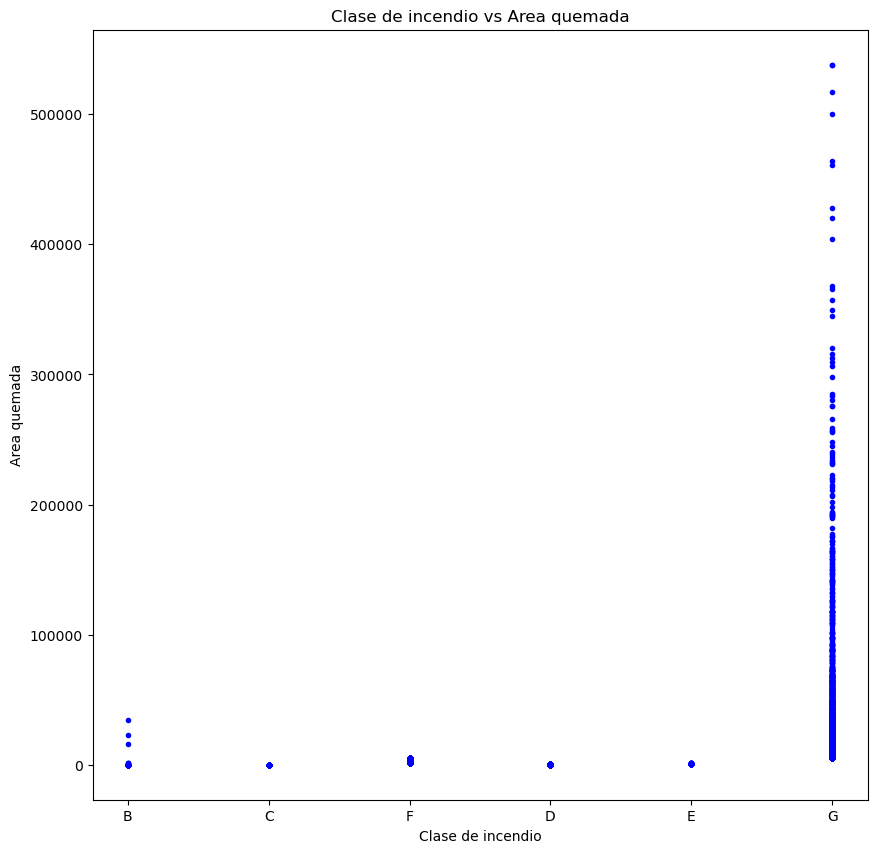

In [55]:
# Generamos un gráfico de dispersión, que nos permitirá ver la relación entre las dos variables.
plt.figure(figsize=(10,10))
plt.plot(data_t['clase_incendio'],data_t['area_quemada'],'.', color='blue')
plt.title('Clase de incendio vs Area quemada')
plt.xlabel('Clase de incendio')  
plt.ylabel('Area quemada')  
plt.show()

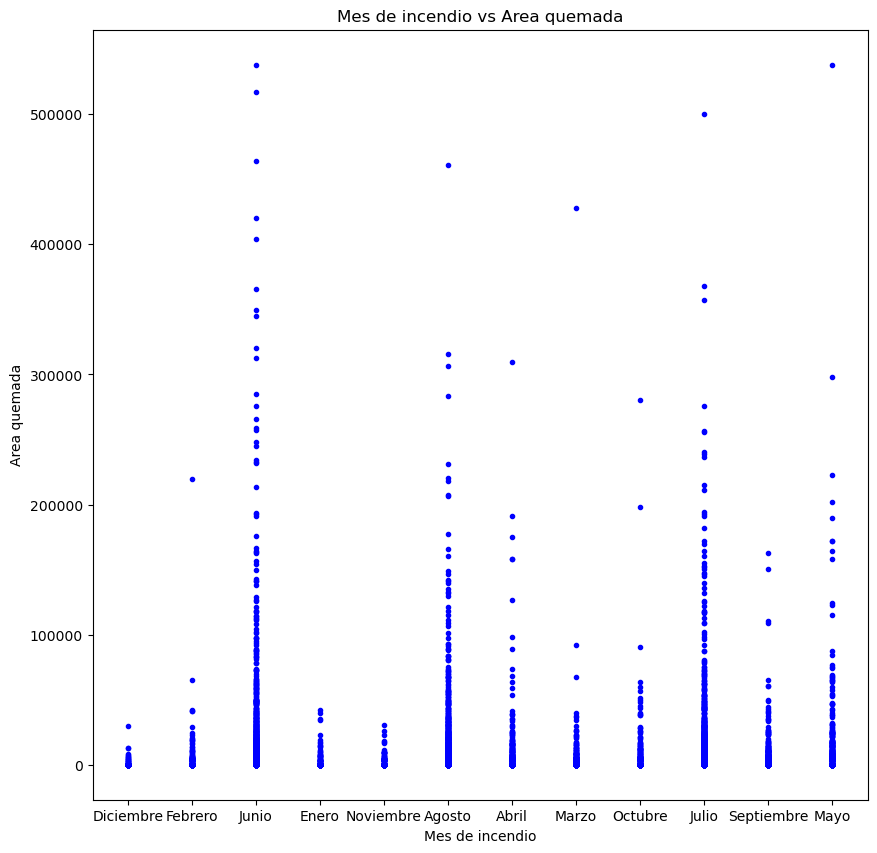

In [57]:
# Generamos un gráfico de dispersión, que nos permitirá ver la relación entre las dos variables.
plt.figure(figsize=(10,10))
plt.plot(data_t['mes_incendio'],data_t['area_quemada'],'.', color='blue')
plt.title('Mes de incendio vs Area quemada')
plt.xlabel('Mes de incendio')  
plt.ylabel('Area quemada')  
plt.show()

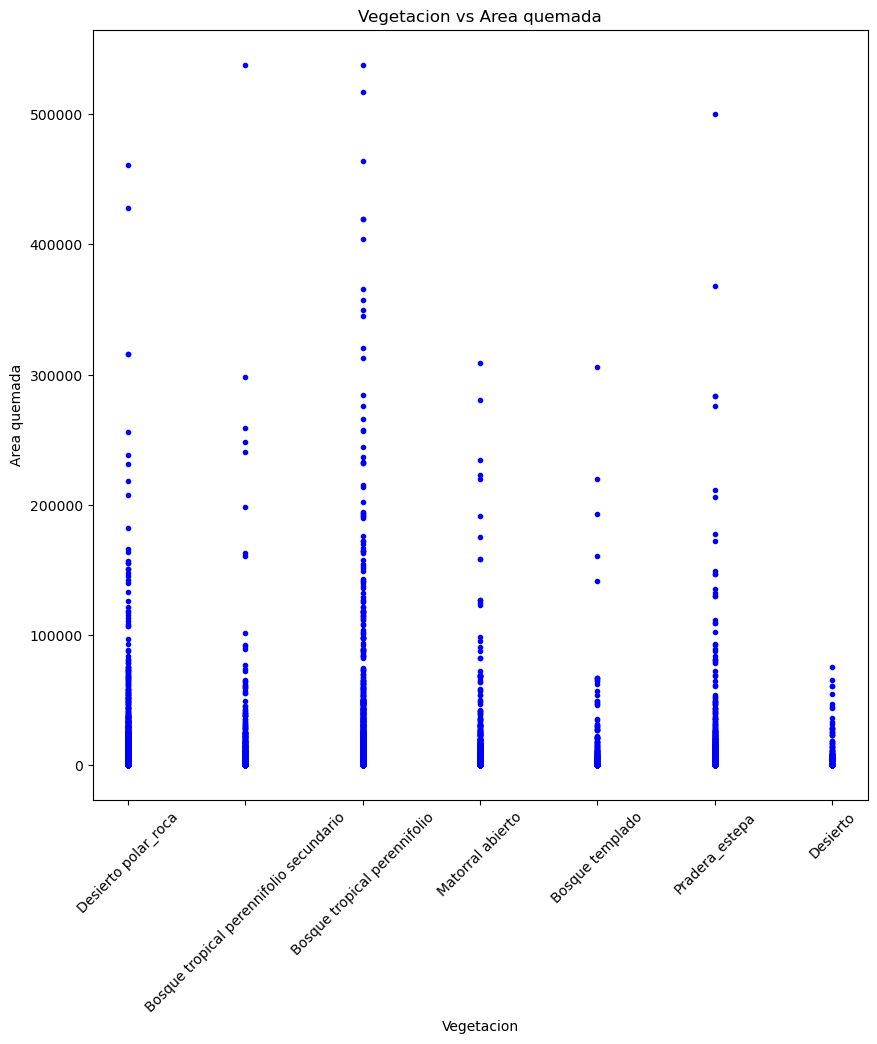

In [59]:
# Generamos un gráfico de dispersión, que nos permitirá ver la relación entre las dos variables.
plt.figure(figsize=(10,10))
plt.plot(data['vegetacion'],data['area_quemada'],'.', color='blue')
plt.title('Vegetacion vs Area quemada')
plt.xlabel('Vegetacion')  
plt.ylabel('Area quemada')  
plt.xticks(rotation=45)
plt.show()

### Transformación de variables

In [61]:
# Se realiza la transformación de variables categóricas (object) a dummies.
data_t = pd.get_dummies(data_t, columns=['clase_incendio','mes_incendio','vegetacion'])

In [63]:
data_t.shape

(26394, 30)

In [65]:
data_t.head()

,area_quemada,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,clase_incendio_B,clase_incendio_C,clase_incendio_D,clase_incendio_E,clase_incendio_F,...,mes_incendio_Noviembre,mes_incendio_Octubre,mes_incendio_Septiembre,vegetacion_Bosque templado,vegetacion_Bosque tropical perennifolio,vegetacion_Bosque tropical perennifolio secundario,vegetacion_Desierto,vegetacion_Desierto polar_roca,vegetacion_Matorral abierto,vegetacion_Pradera_estepa
0,3.0,59.8,8.4,0.0,86.8,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,60.0,168.8,42.2,18.1,124.5,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,1.0,10.4,7.2,0.0,0.0,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,5.2,26.0,0.0,0.0,0.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,1.0,28.4,27.5,1.2,55.4,True,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False


In [67]:
# Convertir todas las columnas booleanas a enteros (True → 1, False → 0)
data_t = data_t.apply(lambda col: col.astype(int) if col.dtype == 'bool' else col)

In [69]:
data_t.head()

,area_quemada,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,clase_incendio_B,clase_incendio_C,clase_incendio_D,clase_incendio_E,clase_incendio_F,...,mes_incendio_Noviembre,mes_incendio_Octubre,mes_incendio_Septiembre,vegetacion_Bosque templado,vegetacion_Bosque tropical perennifolio,vegetacion_Bosque tropical perennifolio secundario,vegetacion_Desierto,vegetacion_Desierto polar_roca,vegetacion_Matorral abierto,vegetacion_Pradera_estepa
0,3.0,59.8,8.4,0.0,86.8,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,60.0,168.8,42.2,18.1,124.5,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1.0,10.4,7.2,0.0,0.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,5.2,26.0,0.0,0.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1.0,28.4,27.5,1.2,55.4,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


### Construcción del modelo

In [71]:
# Se selecciona la variable objetivo, en este caso "area_quemada".
Y=data_t['area_quemada']
# Del conjunto de datos se elimina la variable "area_quemada".
X=data_t.drop(['area_quemada'], axis=1)

In [73]:
# Mostramos nuestros datos
X.head()

,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,clase_incendio_B,clase_incendio_C,clase_incendio_D,clase_incendio_E,clase_incendio_F,clase_incendio_G,...,mes_incendio_Noviembre,mes_incendio_Octubre,mes_incendio_Septiembre,vegetacion_Bosque templado,vegetacion_Bosque tropical perennifolio,vegetacion_Bosque tropical perennifolio secundario,vegetacion_Desierto,vegetacion_Desierto polar_roca,vegetacion_Matorral abierto,vegetacion_Pradera_estepa
0,59.8,8.4,0.0,86.8,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,168.8,42.2,18.1,124.5,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,10.4,7.2,0.0,0.0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,26.0,0.0,0.0,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28.4,27.5,1.2,55.4,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [75]:
Y.head()

0     3.0
1    60.0
2     1.0
3     5.2
4     1.0
Name: area_quemada, dtype: float64

In [77]:
# Se realiza la división entrenamiento - test. Se deja 20% de los datos para el test.
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=0)

In [79]:
# Primero se crea el objeto para construir el modelo
modelo_regresion = LinearRegression()
# Podemos verificar que lo hemos construido.
modelo_regresion

LinearRegression()

In [81]:
# Ajustar el modelo con los datos de entrenamiento
modelo_regresion.fit(X_train,Y_train)

LinearRegression()

### Evaluación del modelo

In [87]:
# Se obtienen las predicciones del modelo sobre el conjunto de entrenamiento.
y_pred = modelo_regresion.predict(X_train)
# Se obtienen las métricas a partir de la predicción y la base de evaluación (valores reales).
print("MSE: %.2f" % mean_squared_error(Y_train, y_pred))
print("RMSE: %.2f" % np.sqrt(mean_squared_error(Y_train, y_pred)))
print("MAE: %.2f" % mean_absolute_error(Y_train, y_pred))
print('R²: %.2f' % r2_score(Y_train, y_pred))

MSE: 234494369.37
RMSE: 15313.21
MAE: 3157.22
R²: 0.23


In [91]:
# Se obtienen las predicciones del modelo sobre el conjunto test.
y_pred = modelo_regresion.predict(X_test)
# Se obtienen las métricas a partir de la predicción y la base de evaluación (valores reales).
print("MSE: %.2f" % mean_squared_error(Y_test, y_pred))
print("RMSE: %.2f" % np.sqrt(mean_squared_error(Y_test, y_pred)))
print("MAE: %.2f" % mean_absolute_error(Y_test, y_pred))
print('R²: %.2f' % r2_score(Y_test, y_pred))

MSE: 297262459.48
RMSE: 17241.30
MAE: 3646.30
R²: 0.23


In [93]:
# Ajustar el modelo con los datos de entrenamiento
modelo_regresion.fit(X,Y)

LinearRegression()

In [95]:
# Podemos visualizar los parámetros del modelos (coeficientes de regresión)
modelo_regresion.coef_

array([-2.02543253e-01, -4.39935041e-01,  1.95023091e-01, -5.66740812e-01,
       -5.06900745e+03, -5.11872497e+03, -5.18154842e+03, -4.75096770e+03,
       -1.94197999e+03,  2.20622285e+04, -5.98236266e+00, -5.22762846e+02,
       -1.77978063e+02, -2.29720099e+02, -1.28635252e+02,  1.30848037e+02,
        2.02808215e+03, -1.99340015e+02,  4.14120589e+02, -4.46333662e+02,
       -1.96662628e+02, -6.65635845e+02,  4.73041644e+02,  1.53801034e+03,
        4.17798919e+01, -1.86366258e+03, -1.59523261e+02,  7.19793576e+01,
       -1.01625396e+02])

In [97]:
# Para visualizar el intercepto, utiliza el atributo intercept_ del modelo
modelo_regresion.intercept_

4944.233823427372

### Interpretación del modelo

In [99]:
# Ajustar el modelo para ver el reporte
model = sm.OLS(Y, X).fit() ## sm.OLS(output, input)
# Mostrar las estadísticas del modelo
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           area_quemada   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     304.0
Date:                Tue, 06 May 2025   Prob (F-statistic):               0.00
Time:                        12:26:20   Log-Likelihood:            -2.9248e+05
No. Observations:               26394   AIC:                         5.850e+05
Df Residuals:                   26367   BIC:                         5.852e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Prec_pre_30                                           -0.2025      0.904     -0.224      0.823      -1.974       1.569
Prec_pre_15                                           -0.4399      2.430     -0.181      0.856      -5.203       4.323
Prec_pre_7                                             0.1950      3.697      0.053      0.958      -7.052       7.442
Prec_cont                                             -0.5667      1.246     -0.455      0.649      -3.008       1.875
clase_incendio_B                                   -2971.4537    173.901    -17.087      0.000   -3312.309   -2630.599
clase_incendio_C                                   -3021.1712    234.302    -12.894      0.000   -3480.416   -2561.926
clase_incendio_D                                   -3083.9947    496.563     -6.211      0.000   -4057.284   -2110.705
clase_incendio_E                                   -2653.4140    685.538     -3.871      0.000   -3997.106   -1309.722
clase_incendio_F                                     155.5738    408.798      0.381      0.704    -645.692     956.840
clase_incendio_G                                    2.416e+04    306.089     78.930      0.000    2.36e+04    2.48e+04
mes_incendio_Abril                                  1042.7945    270.565      3.854      0.000     512.473    1573.116
mes_incendio_Agosto                                  526.0140    286.622      1.835      0.066     -35.781    1087.809
mes_incendio_Diciembre                               870.7988    525.167      1.658      0.097    -158.557    1900.155
mes_incendio_Enero                                   819.0568    435.380      1.881      0.060     -34.311    1672.424
mes_incendio_Febrero                                 920.1416    346.592      2.655      0.008     240.803    1599.481
mes_incendio_Julio                                  1179.6249    283.634      4.159      0.000     623.686    1735.564
mes_incendio_Junio                                  3076.8590    312.509      9.846      0.000    2464.324    3689.394
mes_incendio_Marzo                                   849.4369    271.501      3.129      0.002     317.281    1381.592
mes_incendio_Mayo                                   1462.8975    335.735      4.357      0.000     804.839    2120.956
mes_incendio_Noviembre                               602.4432    417.637      1.443      0.149    -216.147    1421.034
mes_incendio_Octubre                                 852.1142    389.412      2.188      0.029      88.845    1615.383
mes_incendio_Septiembre                              383.1410    364.301      1.052      0.293    -330.908    1097.190
vegetacion_Bosque templado                          2270.9449    608.261      3.734      0.000    1078.721  

### Almacenamiento del modelo

In [ ]:
# Una forma de guardar el modelo es a través de la funcionalidad joblib.
import joblib

In [ ]:
# Ahora guardamos el modelo con el nombre que selecciones.
joblib.dump(modelo_regresion, 'ModeloRegresion.joblib')
# Si lo quieres recuperar más tarde puedes utilizar la siguiente instrucción:
# modelo = load('ModeloRegresion.joblib') 

## MODELO REGRESIÓN POLINOMIAL

In [ ]:
# Construcción de un modelo de regresión polinomial y su evaluación sobre el conjunto test. 
# Para determinar el grado de la transformación polinomial utiliza un conjunto de validación sobre los siguientes valores de grado de polinomio: [2, 3]

In [101]:
# Librería para comando de sistema
import os
# Librerías para manejo de datos
import pandas as pd
import numpy as np
# Librerías de aprendizaje automático.
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para construir un modelo con el algoritmo de regresión lineal
from sklearn.linear_model import LinearRegression
# Para determinar el rendimiento del modelo con las métricas MSE, MAE y R2
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Para realizar la transformación de variables para realizar la regresión polinomial
from sklearn.preprocessing import PolynomialFeatures 
# Para visualizar los datos y el modelo entrenado utilizamos matplotlib
import matplotlib.pyplot as plt

In [ ]:
# Con polinomio grado 2

In [103]:
# Utilizaremos una tranformación de grado 2.
poly = PolynomialFeatures(degree=2)
poly_X = poly.fit_transform(X)

In [105]:
# Esta transformación crea nuevas variables y las añade al conjunto de datos. Veamos cuántas se generan:
poly_X.shape

(26394, 465)

In [107]:
poly_X

array([[  1. ,  59.8,   8.4, ...,   0. ,   0. ,   0. ],
       [  1. , 168.8,  42.2, ...,   0. ,   0. ,   0. ],
       [  1. ,  10.4,   7.2, ...,   0. ,   0. ,   0. ],
       ...,
       [  1. ,   0. ,   0. , ...,   0. ,   0. ,   1. ],
       [  1. ,  86.9,  78.8, ...,   0. ,   0. ,   0. ],
       [  1. ,   0. ,   0. , ...,   0. ,   0. ,   0. ]])

In [109]:
# Construcción del modelo utilizando regresión polinomial
# Se realiza la división entrenamiento - test. Se deja 20% de los datos para el test.
poly_X_train, poly_X_test, poly_Y_train, poly_Y_test = train_test_split(poly_X, Y, test_size = 0.2, random_state = 0)

In [111]:
# Creación del objeto de la clase LinearRegression y ajuste del modelo a los datos.
modelo_regresion_poly = LinearRegression()
# Podemos verificar que lo hemos construido.
modelo_regresion_poly

LinearRegression()

In [113]:
# Ajustar el modelo con los datos de entrenamiento con las nuevas variables polinomiales
modelo_regresion_poly.fit(poly_X_train, poly_Y_train)

LinearRegression()

In [115]:
# Evaluación del modelo
# Se obtienen las predicciones del modelo sobre el conjunto test.
y_pred = modelo_regresion_poly.predict(poly_X_test)

In [121]:
# Se obtienen las métricas a partir de la predicción y la base de evaluación (valores reales).
print('Métricas')
print('------ Modelo de regresión lineal polinomial múltiple----')
print("MSE: %.2f" % mean_squared_error(poly_Y_test, y_pred))
print("RMSE: %.2f" % np.sqrt(mean_squared_error(poly_Y_test, y_pred)))
print("MAE: %.2f" % mean_absolute_error(poly_Y_test, y_pred))
print('R²: %.2f' % r2_score(poly_Y_test, y_pred))

Métricas
------ Modelo de regresión lineal polinomial múltiple----
MSE: 295287425.85
RMSE: 17183.93
MAE: 3502.97
R²: 0.23


In [125]:
# Comparación con regresión lineal
# Se realiza la división entrenamiento - test. Como estamos utilizando el mismo valor para random_state (=0) 
# garantizamos que obtenemos la misma partición utilizada para el modelo de regresión polinomial.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
# Creación del objeto de la clase LinearRegression y ajuste del modelo a los datos.
modelo_reg_lineal = LinearRegression().fit(X_train, Y_train)
# Se obtienen las predicciones del modelo sobre el conjunto test.
y_pred = modelo_reg_lineal.predict(X_test)
# Se obtienen las métricas a partir de la predicción y la base de evaluación (valores reales).
print("MSE: %.2f" % mean_squared_error(Y_test, y_pred))
print("RMSE: %.2f" % np.sqrt(mean_squared_error(Y_test, y_pred)))
print("MAE: %.2f" % mean_absolute_error(Y_test, y_pred))
print('R²: %.2f' % r2_score(Y_test, y_pred))

MSE: 297262459.48
RMSE: 17241.30
MAE: 3646.30
R²: 0.23


In [ ]:
# Con polinomio grado 3

In [127]:
# Utilizaremos una tranformación de grado 3.
poly = PolynomialFeatures(degree=3)
poly_X = poly.fit_transform(X)

In [129]:
# Esta transformación crea nuevas variables y las añade al conjunto de datos. Veamos cuántas se generan:
poly_X.shape

(26394, 4960)

In [131]:
# Construcción del modelo utilizando regresión polinomial
# Se realiza la división entrenamiento - test. Se deja 20% de los datos para el test.
poly_X_train, poly_X_test, poly_Y_train, poly_Y_test = train_test_split(poly_X, Y, test_size = 0.2, random_state = 0)

In [133]:
# Creación del objeto de la clase LinearRegression y ajuste del modelo a los datos.
modelo_regresion_poly = LinearRegression()
# Podemos verificar que lo hemos construido.
modelo_regresion_poly

LinearRegression()

In [135]:
# Ajustar el modelo con los datos de entrenamiento con las nuevas variables polinomiales
modelo_regresion_poly.fit(poly_X_train, poly_Y_train)

LinearRegression()

In [137]:
# Evaluación del modelo
# Se obtienen las predicciones del modelo sobre el conjunto test.
y_pred = modelo_regresion_poly.predict(poly_X_test)

In [141]:
# Se obtienen las métricas a partir de la predicción y la base de evaluación (valores reales).
print('Métricas')
print('------ Modelo de regresión lineal polinomial múltiple----')
print("MSE: %.2f" % mean_squared_error(poly_Y_test, y_pred))
print("RMSE: %.2f" % np.sqrt(mean_squared_error(poly_Y_test, y_pred)))
print("MAE: %.2f" % mean_absolute_error(poly_Y_test, y_pred))
print('R²: %.2f' % r2_score(poly_Y_test, y_pred))

Métricas
------ Modelo de regresión lineal polinomial múltiple----
MSE: 575722530.91
RMSE: 23994.22
MAE: 3876.56
R²: -0.49


In [ ]:
# El modelo de regresión lineal polinomial múltiple de grado 2 es el que tiene mejor resultado vs regresión lineal y la de grado 3

## MODELOS DE REGRESIÓN REGULARIZADA

## REGRESIÓN RIDGE

In [143]:
# Librería para comando de sistema
import os
# Librerías para manejo de datos
import pandas as pd
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para la creación de modelo Ridge
from sklearn.linear_model import Ridge
# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
# Para la validación cruzada
from sklearn.model_selection import KFold 
# Para determinar el rendimiento del modelo con las métricas MSE, MAE y R2
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [145]:
# Se selecciona la variable objetivo, en este caso "area_quemada".
Y=data_t['area_quemada']
# Del conjunto de datos se elimina la variable "area_quemada".
X=data_t.drop(['area_quemada'], axis=1)

In [147]:
# Se realiza la división entrenamiento - test. Se deja 20% de los datos para el test.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [149]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Crear el modelo con estandarización previa
modelo_ridge = make_pipeline(StandardScaler(), Ridge(alpha=0.1))

In [151]:
# Ajuste del modelo
modelo_ridge.fit(X_train,Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=0.1))])

In [155]:
# Ahora probemos el rendimiento sobre el conjunto test.
y_pred = modelo_ridge.predict(X_test)
print('Métricas')
print('------ Modelo de regresión Ridge alfa 0.1----')
print("MSE: %.2f" % mean_squared_error(Y_test, y_pred))
print("RMSE: %.2f" % np.sqrt(mean_squared_error(Y_test, y_pred)))
print("MAE: %.2f" % mean_absolute_error(Y_test, y_pred))
print('R²: %.2f' % r2_score(Y_test, y_pred))

Métricas
------ Modelo de regresión Ridge alfa 0.1----
MSE: 297262515.99
RMSE: 17241.30
MAE: 3646.29
R²: 0.23


#### Con conjunto de validación

In [157]:
# Dividimos el conjunto de entrenamiento en dos: una para la construcción del modelo (sería el nuevo conjunto de 
# entrenamiento) y otro para la validación, el cuál será utilizado para determinar el rendimiento del modelo con una
# combinación específica de hiperparámetros.
X_trainval, X_val, Y_trainval, Y_val = train_test_split(X_train, Y_train, test_size = 0.15, random_state = 0)

In [159]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [161]:
# Fijemos un valor de alpha en 0.1, construyamos el modelo y probemos sobre validación. Utilicemos MAE como métrica de
# rendimiento para hacer la selección.
modelo_ridge = make_pipeline(StandardScaler(), Ridge(alpha=0.1))
modelo_ridge.fit(X_trainval, Y_trainval)
y_pred = modelo_ridge.predict(X_val)
print("MSE: %.2f" % mean_squared_error(Y_val, y_pred))
print("RMSE: %.2f" % np.sqrt(mean_squared_error(Y_val, y_pred)))
print("MAE: %.2f" % mean_absolute_error(Y_val, y_pred))
print('R²: %.2f' % r2_score(Y_val, y_pred))

MSE: 258866924.41
RMSE: 16089.34
MAE: 3167.76
R²: 0.23


In [163]:
# Fijemos un valor de alpha en 0.5, construyamos el modelo y probemos sobre validación. Utilicemos MAE como métrica de
# rendimiento para hacer la selección.
modelo_ridge = make_pipeline(StandardScaler(), Ridge(alpha=0.5))
modelo_ridge.fit(X_trainval, Y_trainval)
y_pred = modelo_ridge.predict(X_val)
print("MSE: %.2f" % mean_squared_error(Y_val, y_pred))
print("RMSE: %.2f" % np.sqrt(mean_squared_error(Y_val, y_pred)))
print("MAE: %.2f" % mean_absolute_error(Y_val, y_pred))
print('R²: %.2f' % r2_score(Y_val, y_pred))

MSE: 258867078.43
RMSE: 16089.35
MAE: 3167.72
R²: 0.23


In [165]:
# Fijemos un valor de alpha en 1.0, construyamos el modelo y probemos sobre validación. Utilicemos MAE como métrica de
# rendimiento para hacer la selección.
modelo_ridge = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
modelo_ridge.fit(X_trainval, Y_trainval)
y_pred = modelo_ridge.predict(X_val)
print("MSE: %.2f" % mean_squared_error(Y_val, y_pred))
print("RMSE: %.2f" % np.sqrt(mean_squared_error(Y_val, y_pred)))
print("MAE: %.2f" % mean_absolute_error(Y_val, y_pred))
print('R²: %.2f' % r2_score(Y_val, y_pred))

MSE: 258867271.02
RMSE: 16089.35
MAE: 3167.68
R²: 0.23


In [ ]:
El de mejor resultado es cuando el alpha es 0.1 pues da el RMSE más bajo

In [219]:
# Determinemos su rendimiento de generalización. Toma en cuenta que ahora debes utilizar todo el conjunto de entrenamiento.
modelo_ridge = make_pipeline(StandardScaler(), Ridge(alpha=0.1))
modelo_ridge.fit(X_train,Y_train)
y_pred = modelo_ridge.predict(X_test)
print("MSE: %.2f" % mean_squared_error(Y_test, y_pred))
print("RMSE: %.2f" % np.sqrt(mean_squared_error(Y_test, y_pred)))
print("MAE: %.2f" % mean_absolute_error(Y_test, y_pred))
print('R²: %.2f' % r2_score(Y_test, y_pred))

MSE: 297262515.99
RMSE: 17241.30
MAE: 3646.29
R²: 0.23


#### Con validación cruzada de k-particiones

In [169]:
# Fijemos el número de particiones. Utilizaremos K = 10.
particiones = KFold(n_splits=10, shuffle=True, random_state = 0)

In [221]:
# Ahora tenemos que definir el espacio de búsqueda, es decir, los valores de alpha que queremos que sean considerados. 
# Para esto se define un diccionario (o grilla) con los valores que podrá asumir el hiperparámetro alpha.
# Probemos con los siguientes valores:
param_grid = {'ridge__alpha': [0.1,0.5,1.0]}

In [223]:
# Pipeline con normalización
modelo_ridge = make_pipeline(StandardScaler(), Ridge())

In [225]:
# Ahora utilizamos GridSearch sobre el grid definido y con 10 particiones en la validación cruzada.
mejor_modelo = GridSearchCV(modelo_ridge, param_grid, cv=particiones, n_jobs=-1)
# Ajuste del modelo
mejor_modelo.fit(X_train, Y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('ridge', Ridge())]),
             n_jobs=-1, param_grid={'ridge__alpha': [0.1, 0.5, 1.0]})

In [227]:
# Podemos ver cual fue el resultado de la búsqueda (mejor valor de alpha)
print("Mejor parámetro: {}".format(mejor_modelo.best_params_)) 

Mejor parámetro: {'ridge__alpha': 1.0}


In [229]:
# También puedes indicarle a GridSearch que seleccione el mejor modelo a partir de la búsqueda con base en una métrica 
# particular. Por ejemplo, hubiésemos podido utilizar la siguiente línea de comando:
mejor_modelo = GridSearchCV(modelo_ridge, param_grid, scoring = 'neg_mean_absolute_error', n_jobs=-1)
mejor_modelo.fit(X_train, Y_train)
print("Mejor parámetro: {}".format(mejor_modelo.best_params_)) 

Mejor parámetro: {'ridge__alpha': 1.0}


In [231]:
modelo_final = mejor_modelo.best_estimator_
# Probemos ahora este modelo sobre test.
y_pred = modelo_final.predict(X_test)
print("MSE: %.2f" % mean_squared_error(Y_test, y_pred))
print("RMSE: %.2f" % np.sqrt(mean_squared_error(Y_test, y_pred)))
print("MAE: %.2f" % mean_absolute_error(Y_test, y_pred))
print('R²: %.2f' % r2_score(Y_test, y_pred))

MSE: 297263024.67
RMSE: 17241.32
MAE: 3646.24
R²: 0.23


## REGRESIÓN LASSO

In [185]:
# Librería para comando de sistema
import os
# Librerías para manejo de datos
import pandas as pd
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para la creación de modelo Ridge
from sklearn.linear_model import Lasso
# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
# Para la validación cruzada
from sklearn.model_selection import KFold 
# Para determinar el rendimiento del modelo con las métricas MSE, MAE y R2
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [187]:
# Se selecciona la variable objetivo, en este caso "precio".
Y=data_t['area_quemada']
# Del conjunto de datos se elimina la variable "precio".
X=data_t.drop(['area_quemada'], axis=1)

In [189]:
# Se realiza la división entrenamiento - test. Se deja 20% de los datos para el test.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [191]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

In [193]:
# Para acelerar la convergencia del algoritmo que utiliza Lasso para optimizar la función de costo, utilizaremos la opción
# de normalizar los datos para que todos estén en el mismo rango.
modelo_lasso = make_pipeline(StandardScaler(), Lasso(alpha=1.0))
modelo_lasso

Pipeline(steps=[('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [195]:
# Ajuste del modelo
modelo_lasso.fit(X_train,Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [197]:
# Ahora probemos el rendimiento sobre el conjunto test.
y_pred = modelo_lasso.predict(X_test)
print("MSE: %.2f" % mean_squared_error(Y_test, y_pred))
print("RMSE: %.2f" % np.sqrt(mean_squared_error(Y_test, y_pred)))
print("MAE: %.2f" % mean_absolute_error(Y_test, y_pred))
print('R²: %.2f' % r2_score(Y_test, y_pred))

MSE: 297262338.82
RMSE: 17241.30
MAE: 3644.48
R²: 0.23


In [199]:
# Fijemos el número de particiones. Utilizaremos K = 10.
particiones = KFold(n_splits=10, shuffle=True, random_state = 0)

In [201]:
# Ahora tenemos que definir el espacio de búsqueda, es decir, los valores de alpha que queremos que sean considerados. 
# Para esto se define un diccionario (o grilla) con los valores que podrá asumir el hiperparámetro alpha.
# Probemos con los siguientes valores:
param_grid = {'lasso__alpha': [1, 2, 3, 4, 5]}

In [203]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

In [205]:
# Creamos el pipeline con estandarización previa. Definimos el modelo sin ningún valor del hiperparámetro alpha
modelo_lasso = make_pipeline(StandardScaler(), Lasso())

In [207]:
# Ahora utilizamos GridSearch sobre el grid definido y con 10 particiones en la validación cruzada.
mejor_modelo = GridSearchCV(modelo_lasso, param_grid, cv=particiones, n_jobs=-1)
# Ajuste del modelo
mejor_modelo.fit(X_train, Y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('lasso', Lasso())]),
             n_jobs=-1, param_grid={'lasso__alpha': [1, 2, 3, 4, 5]})

In [209]:
# Podemos ver cual fue el resultado de la búsqueda (mejor valor de alpha)
print("Mejor parámetro: {}".format(mejor_modelo.best_params_)) 

Mejor parámetro: {'lasso__alpha': 5}


In [211]:
# También puedes indicarle a GridSearch que seleccione el mejor modelo a partir de la búsqueda con base en una métrica 
# particular. Por ejemplo, hubiésemos podido utilizar la siguiente línea de comando para ver el que tiene mejor RMSE:
mejor_modelo = GridSearchCV(modelo_lasso, param_grid, scoring = 'neg_root_mean_squared_error', n_jobs=-1 )
mejor_modelo.fit(X_train, Y_train)
print("Mejor parámetro: {}".format(mejor_modelo.best_params_)) 

Mejor parámetro: {'lasso__alpha': 5}


In [213]:
modelo_final = mejor_modelo.best_estimator_
# Probemos ahora este modelo sobre test.
y_pred = modelo_final.predict(X_test)
print("MSE: %.2f" % mean_squared_error(Y_test, y_pred))
print("RMSE: %.2f" % np.sqrt(mean_squared_error(Y_test, y_pred)))
print("MAE: %.2f" % mean_absolute_error(Y_test, y_pred))
print('R²: %.2f' % r2_score(Y_test, y_pred))

MSE: 297264686.41
RMSE: 17241.37
MAE: 3638.02
R²: 0.23


In [215]:
# Revisar los parámetros del modelo entrenado
coeficientes = modelo_final.named_steps['lasso'].coef_
print(modelo_final.named_steps)
variables = X_train.columns

{'standardscaler': StandardScaler(), 'lasso': Lasso(alpha=5)}


In [217]:
# Mostrar en una tabla los valores de los coeficientes para cada variable
pd.DataFrame({'coeficientes':coeficientes,'variables':variables})

,coeficientes,variables
0,-19.738518,Prec_pre_30
1,-17.110006,Prec_pre_15
2,3.051377,Prec_pre_7
3,-45.769938,Prec_cont
4,-0.000000,clase_incendio_B
5,-15.275895,clase_incendio_C
6,-13.346564,clase_incendio_D
7,34.653529,clase_incendio_E
8,663.510707,clase_incendio_F
9,8140.142599,clase_incendio_G
